<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Need)</span></div>

## 1 Random Numbers

### 1.1 Real and Pseudo Random Numbers

pseudo RNG (PRNG) are numbers generated by deterministic algorithm, hence, some may argue that they are not 'truly' random.

### 1.2 NumPy’s PRNG

In [1]:
np.random.rand()                # Give one number

0.11967282167427118

In [2]:
np.random.rand(10)              # Give ten numbers`

array([0.50713545, 0.61447343, 0.52184907, 0.47001895, 0.2741514 ,
       0.05274937, 0.12659163, 0.20070699, 0.57498458, 0.60666365])

In [3]:
np.random.rand(5,2)             # Give five sets of 2

array([[0.64735948, 0.20459523],
       [0.31595757, 0.4534427 ],
       [0.03389356, 0.38779738],
       [0.46410558, 0.94098995],
       [0.13997627, 0.20505761]])

In [19]:
n = 10000
random_numbers = np.random.rand(n)
# The numbers less than .5 must be about 50%
np.sum(random_numbers < .5) / n * 100

49.230000000000004

In [20]:
# The numbers less than .25 must be about 25%
np.sum(random_numbers < .25) / n * 100

24.85

In [21]:
# The numbers more than .75 must be about 25%
np.sum(random_numbers > .75) / n * 100

25.36

### 1.3 A simple graphical test

Text(0, 0.5, 'Value of random number')

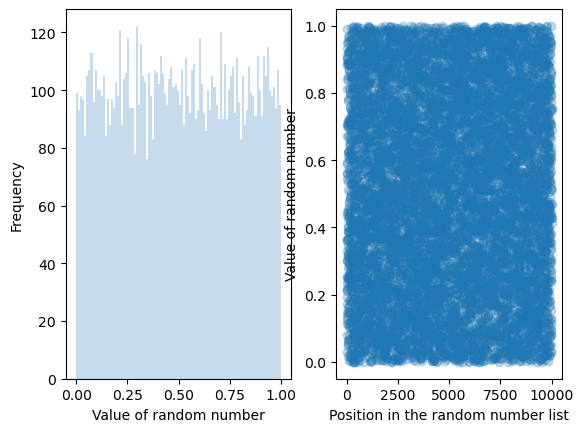

In [26]:
from matplotlib import pyplot as plt
n = 10000
random_numbers = np.random.rand(n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.4 Uniformly beyond \([0,1)\)

Text(0, 0.5, 'Value of random number')

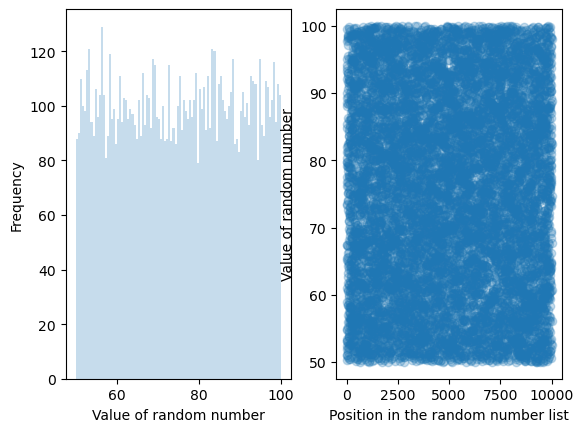

In [27]:
n = 10000
random_numbers = np.random.uniform(low=50, high=100, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.5 ‘seeding’ a PRNG

In [28]:
np.random.randint(0, 100, 10)     # Ten integers between 0 and 100

array([38, 70, 67,  2, 41, 56, 17, 28, 85, 37])

In [29]:
np.random.randint(0, 100, 10)     # Another ten integers between 0 and 100

array([99, 20, 92, 93, 66, 78, 60, 39, 19, 22])

In [30]:
np.random.seed(1234)              # Specifying a seed
np.random.randint(0, 100, 10)     # Ten integers between 0 and 100

array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

## 2 Simulating a Magic-8 Ball

In [39]:
def shake_magic_8():
    '''
    Function to simulate a Magic-8 ball!
    '''
    options = ['It is certain.', 'It is decidedly so.',
               'Without a doubt.', 'Yes definitely.',
               'You may rely on it.', 'As I see it, yes.',
               'Most likely.', 'Outlook good.',
               'Yes.', 'Signs point to yes.',
               'Reply hazy, try again.', 'Ask again later.',
               'Better not tell you now.', 'Cannot predict now.',
               'Concentrate and ask again.', 'Don\'t count on it.',
               'My reply is no.', 'My sources say no.',
               'Outlook not so good.', 'Very doubtful.']

    return np.random.choice(options)

questions = ['Will I be pretty?',
             'Will I be rich?',
             'Will I be in trouble?']

for question in questions:
    print(f'Q: {question}')
    print(f'A: {shake_magic_8()}\n')

Q: Will I be pretty?
A: Without a doubt.

Q: Will I be rich?
A: Very doubtful.

Q: Will I be in trouble?
A: Better not tell you now.



## 3 Flipping Coins

### 3.1 A fair coin

In [40]:
np.random.choice(['Head', 'Tails'])

'Tails'

In [41]:
no_of_coins = 10
np.random.choice(['Head', 'Tails'], no_of_coins)

array(['Tails', 'Tails', 'Tails', 'Head', 'Tails', 'Head', 'Tails',
       'Tails', 'Head', 'Head'], dtype='<U5')

In [56]:
def flip_coins(no_of_coins=1, probability=.5):
    '''
    Returns the number of values greater that 
    `probability` (considered as 'Heads').
    '''
    results = np.random.rand(no_of_coins)
    no_of_heads = np.sum(results > probability)
    return no_of_heads

no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 48.30%


### 3.2 A biased coin

In [57]:
no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins, probability = .3)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 73.60%


### 3.3 A flipping experiment

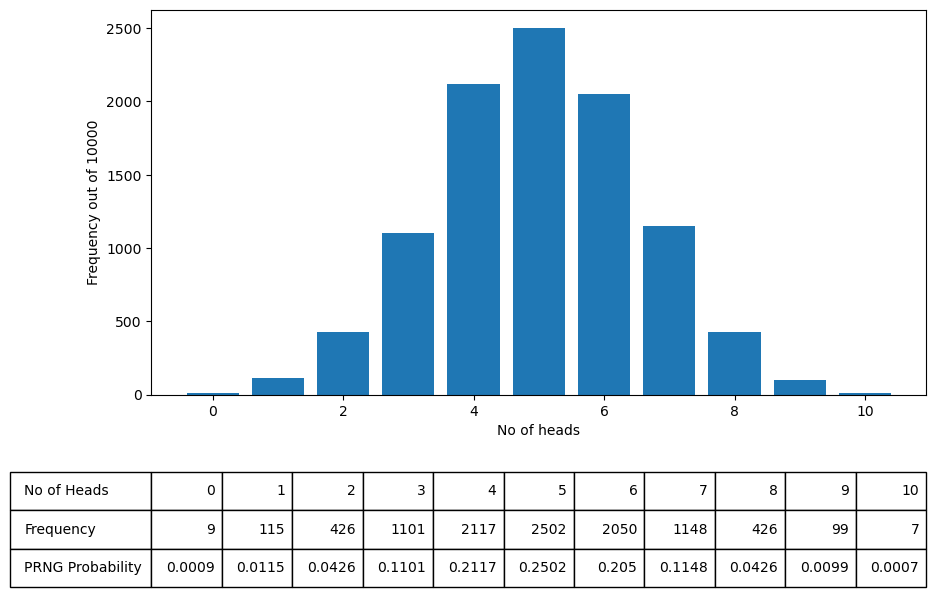

In [63]:
no_of_repeats = 10_000
result = [flip_coins(no_of_coins=10) for _ in range(no_of_repeats)]
no_of_heads, heads_counts = np.unique(result, return_counts=True)
heads_probability = heads_counts/no_of_repeats
plt.rcParams['figure.figsize'] = (10,5)
plt.bar(no_of_heads, heads_counts);
plt.xlabel('No of heads')
plt.ylabel(f'Frequency out of {no_of_repeats}')
plt.table([no_of_heads, heads_counts, heads_probability],
          rowLabels=['No of Heads', 'Frequency', 'PRNG Probability'],
          loc='bottom',
          bbox=[0, -0.5, 1, 0.3])

In [10]:
from scipy.stats import binom
binom.pmf(k=7, n=10, p=.5)

0.11718749999999996

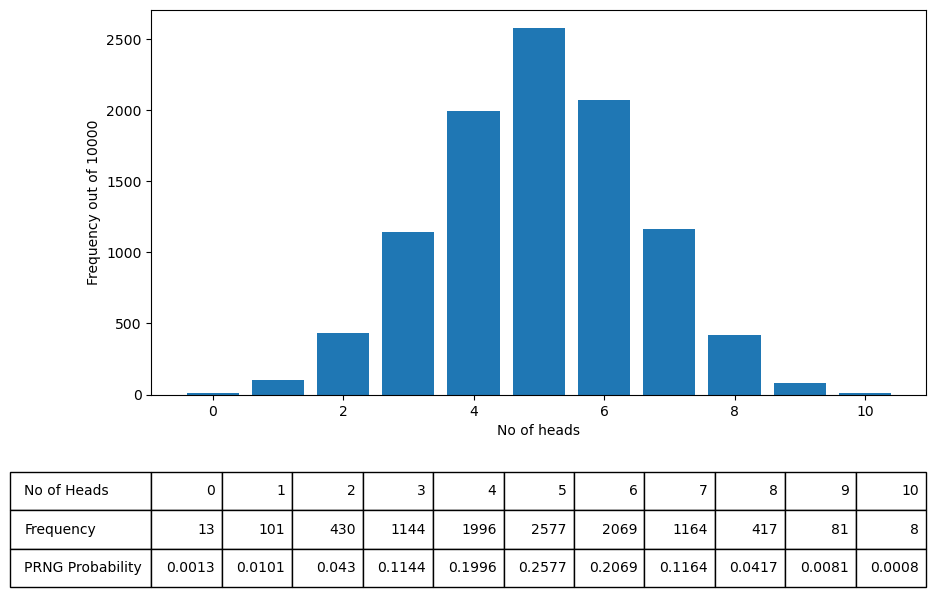

In [15]:
def flip_coins(no_of_coins=1, probability=.5):
    '''
    Returns the number of values greater that 
    `probability` (considered as 'Heads').
    '''
    results = np.random.rand(no_of_coins)
    no_of_heads = np.sum(results > probability)
    return no_of_heads
no_of_repeats = 10_000
result = [flip_coins(no_of_coins=10) for _ in range(no_of_repeats)]
no_of_heads, heads_counts = np.unique(result, return_counts=True)
heads_probability = heads_counts/no_of_repeats
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.bar(no_of_heads, heads_counts);
plt.xlabel('No of heads')
plt.ylabel(f'Frequency out of {no_of_repeats}')
plt.table([no_of_heads, heads_counts, heads_probability],
          rowLabels=['No of Heads', 'Frequency', 'PRNG Probability'],
          loc='bottom',
          bbox=[0, -0.5, 1, 0.3])
binomial_probabilities = binom.pmf(k=no_of_heads, n=10, p=.5)

## Exercise 1 :  12C, 13C

In [109]:
repeat = 1000
cholesterol = 27

def prob(): #prob = prob of failure
    list_c13 = []
    for c in range(cholesterol):
        results = np.random.rand(1)
        list_c13.append(results < 0.0111)
        no_of_c13 = np.sum(list_c13)
        return no_of_c13
outcome = [prob() for i in range (repeat)]

print(np.mean(outcome))
print(np.std(outcome))

0.016
0.125475097130865
